# Congressional Record and Hansard Word Cloud Analysis


This notebook contains the code to create a selection of different word clouds from the Congressional Record and Hansard datasets. Word clouds are used to get a basic understanding of their most frequently used stems.


## Setup


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

DATA_PATH = 'data/'
DIST_PATH = 'dist/'

plt.style.use('ggplot')

/var/folders/g4/5xzy77v17m1fbt0xq_sn3f140000gn/T/ipykernel_66238/3697234775.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Word cloud function for the Congressional Record and Hansard datasets


In [2]:
def get_sorted_tfidf_scores(stems):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(stems)
    tfidf_scores = X.sum(axis=0).A1
    tfidf_scores_and_stems = zip(
        vectorizer.get_feature_names_out(), tfidf_scores)
    sorted_scores = sorted(tfidf_scores_and_stems,
                           key=lambda x: x[1], reverse=True)
    return sorted_scores

## Complete corpus word clouds


In [3]:
congressional_record = pd.read_csv(
    DATA_PATH + 'non_procedural_congressional_record.csv')
hansard = pd.read_csv(DATA_PATH + 'non_procedural_hansard.csv')

### Calculating the TF-IDF scores for the cleaned stems in the Congressional Record and Hansard datasets


**Calculating Congressional Record and Hansard TF-IDF scores**


In [4]:
congressional_record_stems = congressional_record['cleaned_stems']
hansard_stems = hansard['cleaned_stems']

congressional_record_tfidf_scores = get_sorted_tfidf_scores(
    congressional_record_stems)
hansard_tfidf_scores = get_sorted_tfidf_scores(
    hansard_stems)

**Calculating Democrat and Republican TF-IDF scores**


In [5]:
democrat_stems = congressional_record[
    congressional_record['party'] == 'D']['cleaned_stems']
republican_stems = congressional_record[
    congressional_record['party'] == 'R']['cleaned_stems']

democrat_tfidf_scores = get_sorted_tfidf_scores(
    democrat_stems)
republican_tfidf_scores = get_sorted_tfidf_scores(
    republican_stems)

**Calculating Labour and Conservative TF-IDF scores**


In [6]:
labour_stems = hansard[hansard['speech_party']
                       == 'Labour']['cleaned_stems']
conservative_stems = hansard[hansard['speech_party']
                             == 'Conservative']['cleaned_stems']

labour_tfidf_scores = get_sorted_tfidf_scores(
    labour_stems)
conservative_tfidf_scores = get_sorted_tfidf_scores(
    conservative_stems)

### Visualising the Congressional Record and Hansard TF-IDF score word clouds


**Congressional Record and Hansard TF-IDF score word clouds**


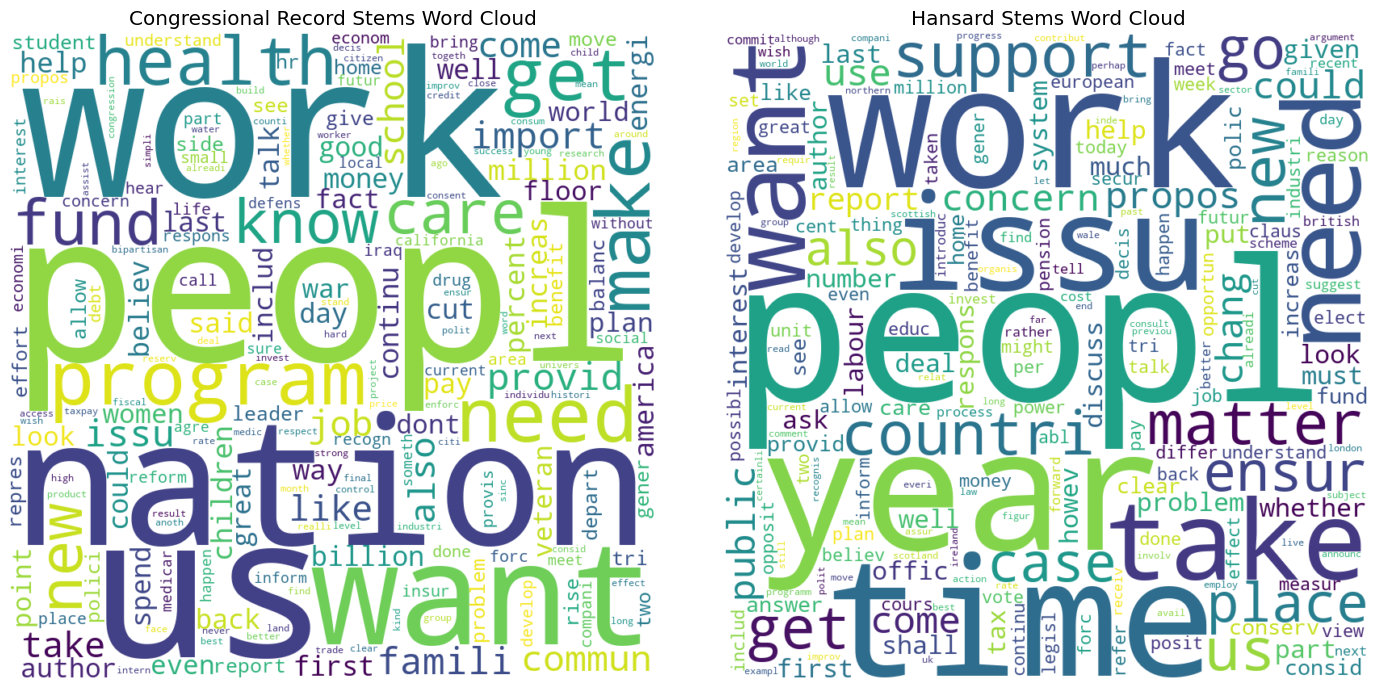

In [7]:
congressional_record_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(congressional_record_tfidf_scores))
hansard_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(hansard_tfidf_scores))

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(congressional_record_word_cloud,
           interpolation='bilinear')
plt.title('Congressional Record Stems Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hansard_word_cloud, interpolation='bilinear')
plt.title('Hansard Stems Word Cloud')
plt.axis('off')

plt.tight_layout(pad=5)
plt.show()

**Democrat and Republican TF-IDF score word clouds**


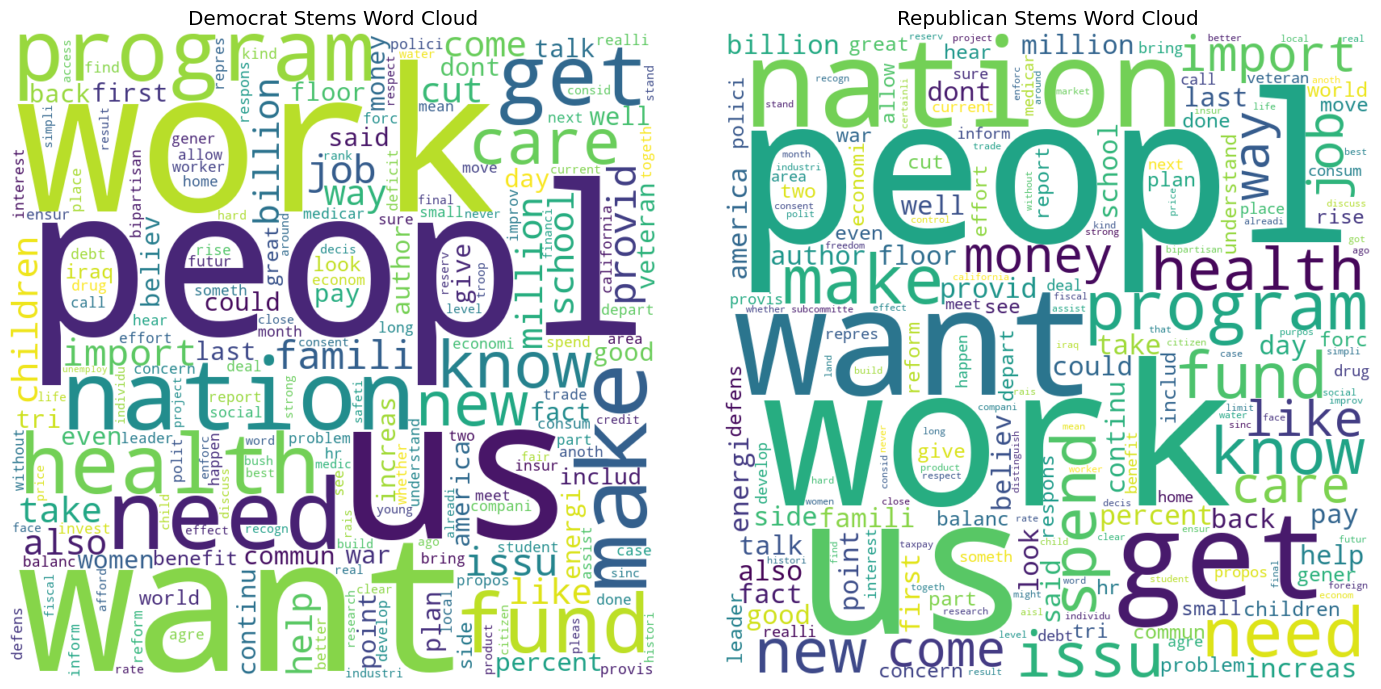

In [8]:
democrat_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(democrat_tfidf_scores))
republican_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(republican_tfidf_scores))

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(democrat_word_cloud, interpolation='bilinear')
plt.title('Democrat Stems Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(republican_word_cloud, interpolation='bilinear')
plt.title('Republican Stems Word Cloud')
plt.axis('off')

plt.tight_layout(pad=5)
plt.show()

**Labour and Conservative TF-IDF score word clouds**


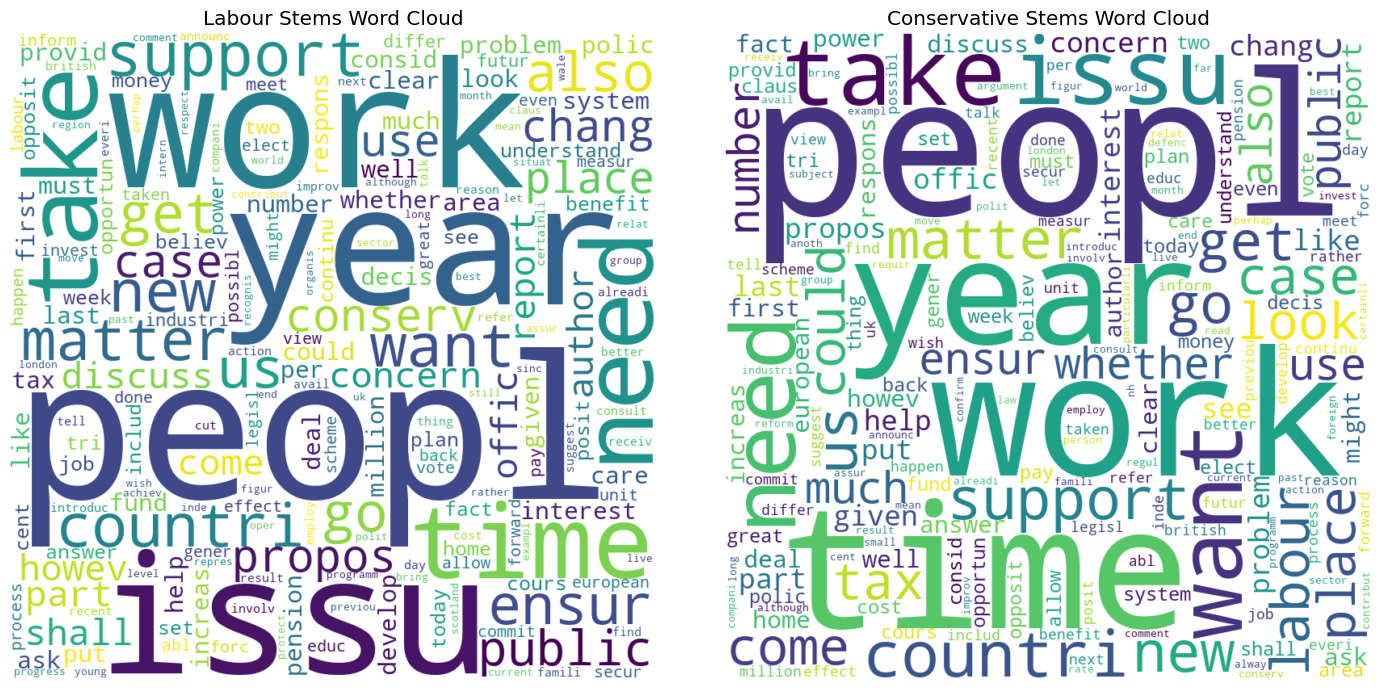

In [9]:
labour_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(labour_tfidf_scores))
conservative_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(conservative_tfidf_scores))

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(labour_word_cloud, interpolation='bilinear')
plt.title('Labour Stems Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(conservative_word_cloud, interpolation='bilinear')
plt.title('Conservative Stems Word Cloud')
plt.axis('off')

plt.tight_layout(pad=5)
plt.show()

## Climate word clouds


In [10]:
climate_congressional_record = pd.read_csv(
    DATA_PATH + 'climate_congressional_record.csv')
climate_hansard = pd.read_csv(DATA_PATH + 'climate_hansard.csv')

### Calculating the TF-IDF scores for the cleaned stems in the Climate Congressional Record and Climate Hansard datasets


**Calculating Congressional Record and Hansard TF-IDF scores**


In [11]:
climate_congressional_record_stems = climate_congressional_record['cleaned_stems']
climate_hansard_stems = climate_hansard['cleaned_stems']

climate_congressional_record_tfidf_scores = get_sorted_tfidf_scores(
    climate_congressional_record_stems)
climate_hansard_tfidf_scores = get_sorted_tfidf_scores(climate_hansard_stems)

**Calculating Democrat and Republican TF-IDF scores**


In [12]:
climate_democrat_stems = climate_congressional_record[
    climate_congressional_record['party'] == 'D']['cleaned_stems']
climate_republican_stems = climate_congressional_record[
    climate_congressional_record['party'] == 'R']['cleaned_stems']

climate_democrat_tfidf_scores = get_sorted_tfidf_scores(climate_democrat_stems)
climate_republican_tfidf_scores = get_sorted_tfidf_scores(
    climate_republican_stems)

**Calculating Labour and Conservative TF-IDF scores**


In [13]:
climate_labour_stems = climate_hansard[climate_hansard['speech_party']
                                       == 'Labour']['cleaned_stems']
climate_conservative_stems = climate_hansard[climate_hansard['speech_party']
                                             == 'Conservative']['cleaned_stems']

climate_labour_tfidf_scores = get_sorted_tfidf_scores(climate_labour_stems)
climate_conservative_tfidf_scores = get_sorted_tfidf_scores(
    climate_conservative_stems)

### Visualising the Climate Congressional Record and Climate Hansard TF-IDF score word clouds


**Congressional Record and Hansard TF-IDF score word clouds**


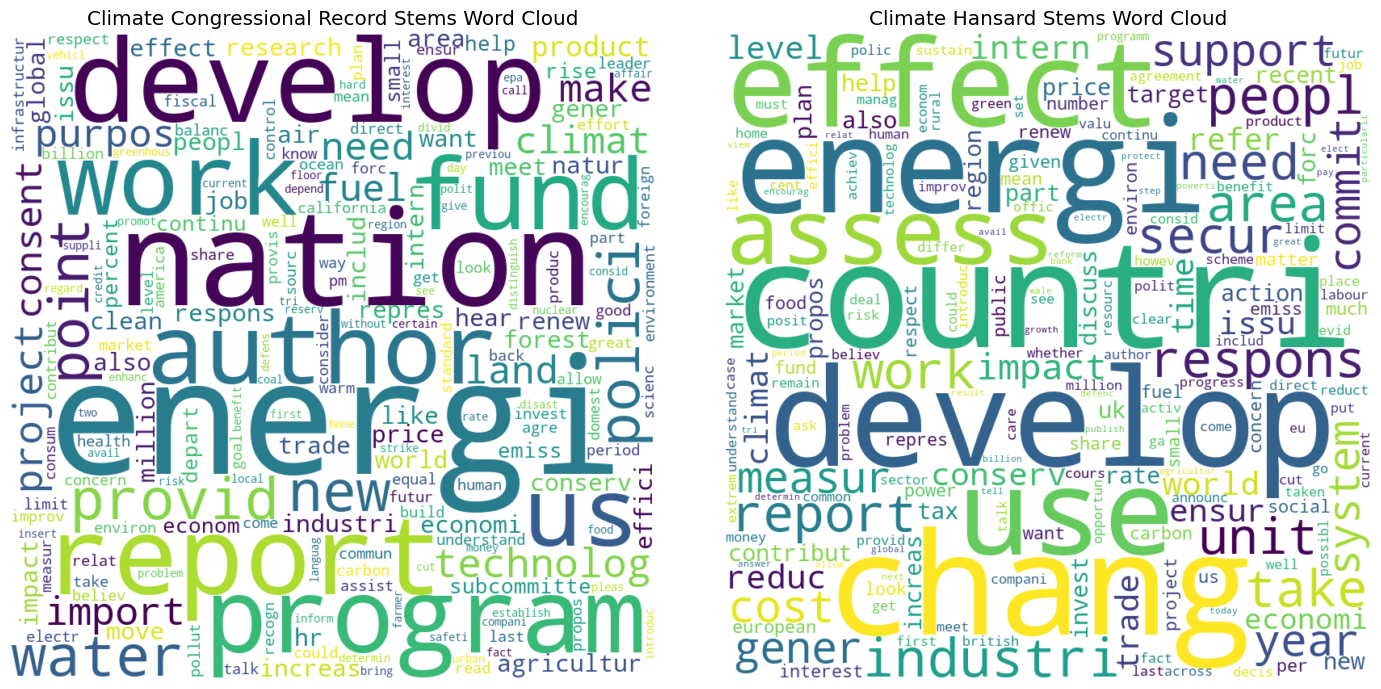

In [14]:
climate_congressional_record_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(climate_congressional_record_tfidf_scores))
climate_hansard_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(climate_hansard_tfidf_scores))

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(climate_congressional_record_word_cloud, interpolation='bilinear')
plt.title('Climate Congressional Record Stems Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(climate_hansard_word_cloud, interpolation='bilinear')
plt.title('Climate Hansard Stems Word Cloud')
plt.axis('off')

plt.tight_layout(pad=5)
plt.show()

**Democrat and Republican TF-IDF score word clouds**


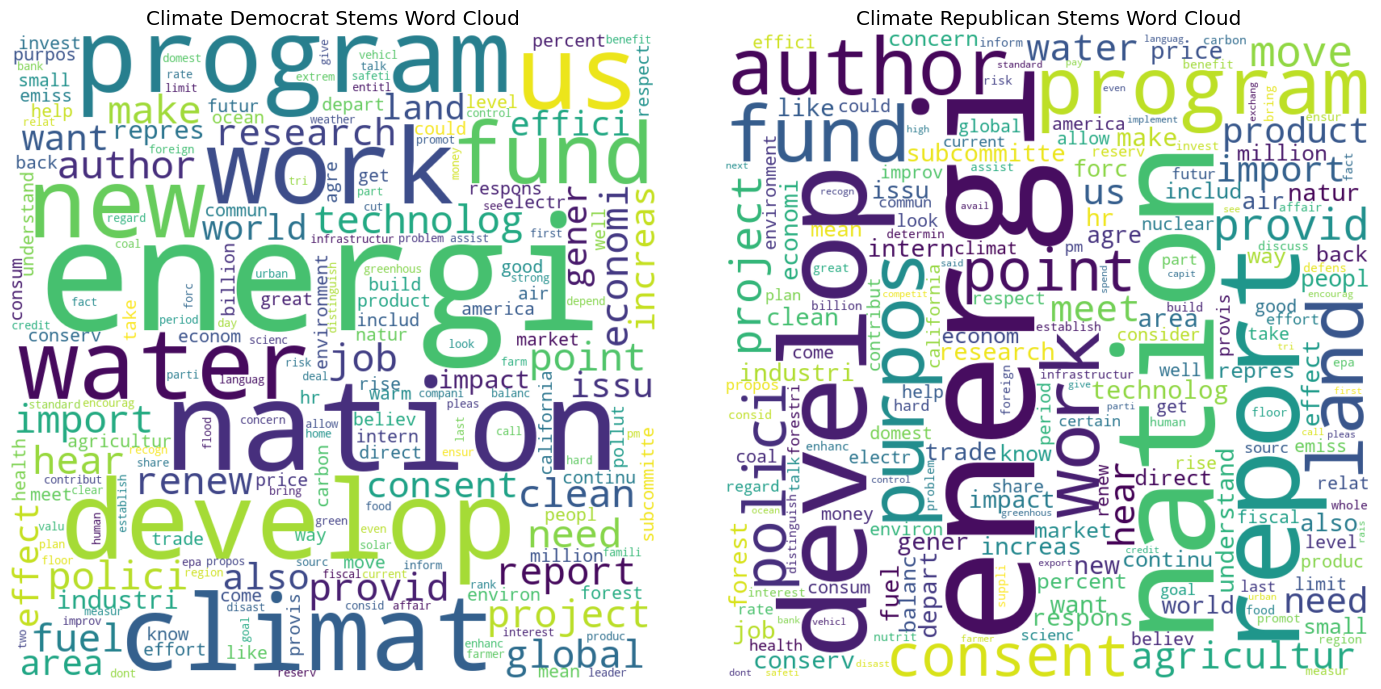

In [15]:
climate_democrat_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(climate_democrat_tfidf_scores))
climate_republican_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(climate_republican_tfidf_scores))

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(climate_democrat_word_cloud, interpolation='bilinear')
plt.title('Climate Democrat Stems Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(climate_republican_word_cloud, interpolation='bilinear')
plt.title('Climate Republican Stems Word Cloud')
plt.axis('off')

plt.tight_layout(pad=5)
plt.show()

**Labour and Conservative TF-IDF score word clouds**


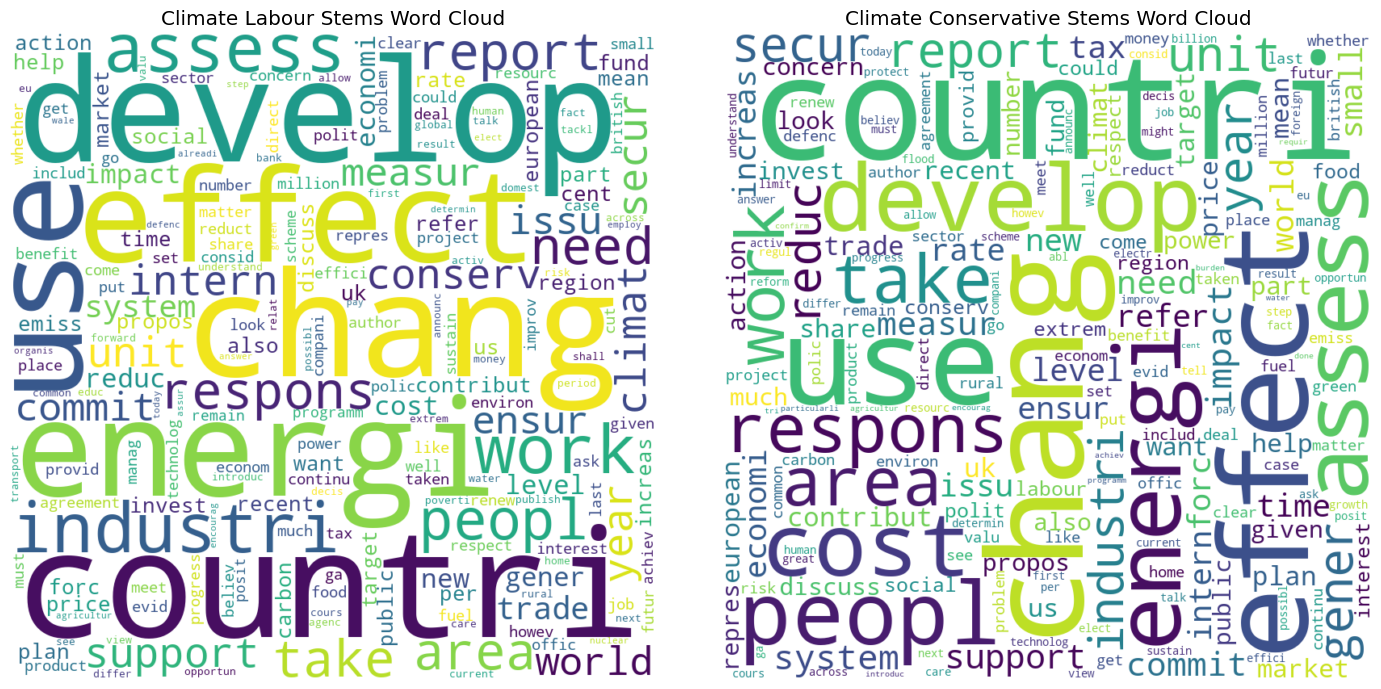

In [16]:
climate_labour_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(climate_labour_tfidf_scores))
climate_conservative_word_cloud = WordCloud(
    width=800, height=800, background_color='white').generate_from_frequencies(
    dict(climate_conservative_tfidf_scores))

plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(climate_labour_word_cloud, interpolation='bilinear')
plt.title('Climate Labour Stems Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(climate_conservative_word_cloud, interpolation='bilinear')
plt.title('Climate Conservative Stems Word Cloud')
plt.axis('off')

plt.tight_layout(pad=5)
plt.show()